In [1]:
#S-a efectuat un studiu despre starea domeniului Data Science, iar datele colectate sunt salvate in fisierul "data/surveyDataScience.csv".

#1.a. Sa se stabileasca:

#numarul de respondenti (de la care s-au colectate informatiile) x

#numar si tipul informatiilor (atributelor, proprietatilor) detinute pentru un respondent 

#numarul de respondenti pentru care se detin date complete

#durata medie a anilor de studii superioare pentru acesti respondenti (cea efectiva sau cea estimata), 

#durata medie a anilor de studii pentru respondentii din Romania

#durata medie a anilor de studii pentru respondentii din Romania care sunt femei. 

#Comparati rezultatele obtinute pentru cele trei grupuri de respondenti. 
#Se presupune ca studiile de licenta dureaza 3 ani, cele de master 2 ani si cele de doctorat 3 ani.


#numarul de respondenti femei din Romania pentru care se detin date complete
#numarul de femei din Romania care programeaza in Python, 
#precum si intervalul de varsta cu cele mai multe femei care programeaza in Python? 
#Dar in C++? Comparati rezultatele obtinute pentru cele doua limbaje de programare.
#domeniul de valori posibile si valorile extreme pentru fiecare atribut/proprietate (feature). 
#In cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate
#transformati informatiile despre vechimea in programare in numar de ani 
#(folositi in locul intervalului, mijlocul acestuia) si apoi calculati momentele de ordin 1 si 2 
#pentru aceasta variabila (minim, maxim, media, deviatia standard, mediana). 
#Ce se poate spune despre aceasta variabila?

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_survey_data():
    # Citirea datelor din fișierul CSV
    survey_data = pd.read_csv("data/surveyDataSience.csv", delimiter=',', header=[0,1], low_memory=False)
    survey_data.columns = survey_data.columns.get_level_values(0)
    survey_data = survey_data[1:].reset_index(drop=True)

    # Numarul de respondenti
    num_respondents = survey_data.shape[0]
    print("Numarul de respondenti:", num_respondents, "\n")

    # Numarul si tipul informatiilor (atributelor, proprietatilor) detinute pentru un respondent
    num_properties = survey_data.shape[1]
    print("Numarul de proprietati:", num_properties)
    print("Tipul informatiilor:\n", survey_data.iloc[0].apply(type))

    # Numarul de respondenti pentru care se detin date complete
    num_complete_respondents = survey_data.dropna().shape[0]
    print("\nNumarul de respondenti pentru care se detin date complete:", num_complete_respondents, "\n")

    # Durata medie a anilor de studii superioare pentru acesti respondenti
    degree_years = {
        "Bachelor’s degree": 3,
        "Master’s degree": 5,
        "Doctoral degree": 8,
        "Professional doctorate": 8,
        "Some college/university study without earning a bachelor’s degree": 0,
        "I prefer not to answer": 0,
        "No formal education past high school": 0
    }
    survey_data['study_years'] = survey_data['Q4'].map(degree_years)
    avg_study_years = survey_data['study_years'].mean()
    print("Durata medie a studiilor pentru toti respondentii:", avg_study_years)

    # Durata medie a anilor de studii pentru respondentii din Romania
    romania_data = survey_data[survey_data['Q3'] == 'Romania']
    avg_study_years_romania = romania_data['study_years'].mean()
    print("Durata medie a studiilor pentru respondenții din Romania:", avg_study_years_romania)

    # Durata medie a anilor de studii pentru respondentii din Romania care sunt femei
    romania_females = romania_data[romania_data['Q2'] == 'Woman']
    avg_study_years_romania_females = romania_females['study_years'].mean()
    print("Durata medie a studiilor pentru femeile din Romania:", avg_study_years_romania_females)

    # Numarul de respondenti femei din Romania pentru care se detin date complete
    complete_data = survey_data.dropna()
    complete_romania_females = complete_data[(complete_data['Q2'] == 'Woman') & (complete_data['Q3'] == 'Romania')]
    num_complete_romania_females = complete_romania_females.shape[0]
    print("Numarul de femei din Romania pentru care se detin date complete:", num_complete_romania_females)

    # Numarul de femei din Romania care programeaza in Python
    python_females_romania = survey_data[(survey_data['Q2'] == 'Woman') & (survey_data['Q3'] == 'Romania') & (survey_data['Q7_Part_1'] == 'Python')]
    num_python_females_romania = python_females_romania.shape[0]
    print("Numarul de femei din Romania care programeaza in Python:", num_python_females_romania)

    # Intervalul de varsta cu cele mai multe femei care programeaza in Python
    age_groups_python = python_females_romania['Q1'].value_counts()
    most_common_age_group_python = age_groups_python.idxmax()
    print("Intervalul de varsta cu cele mai multe femei care programeaza in Python:", most_common_age_group_python)

    # Numarul de femei din Romania care programeaza in C++
    cpp_females_romania = survey_data[(survey_data['Q2'] == 'Woman') & (survey_data['Q3'] == 'Romania') & (survey_data['Q7_Part_5'] == 'C++')]
    num_cpp_females_romania = cpp_females_romania.shape[0]
    print("Numarul de femei din România care programează în C++:", num_cpp_females_romania)

    # Intervalul de varsta cu cele mai multe femei care programeaza in C++
    age_groups_cpp = cpp_females_romania['Q1'].value_counts()
    most_common_age_group_cpp = age_groups_cpp.idxmax()
    print("Intervalul de varsta cu cele mai multe femei care programeaza in C++:", most_common_age_group_cpp)

    # Analiza proprietatilor
    print("\nAnaliza proprietatilor:")
    for col in survey_data.columns:
        unique_vals = survey_data[col].dropna().unique()
        num_unique = len(unique_vals)

        if num_unique == 0:
            print(f"- {col}: 1 optiune posibila (ex: None)")
        elif num_unique == 1:
            print(f"- {col}: 1 opțiune posibila (ex: {unique_vals[0]})")
        else:
            if survey_data[col].dtype == 'object':
                print(f"- {col}: {num_unique} raspunsuri distincte")
            else:
                print(f"- {col}: Min={survey_data[col].min()}, Max={survey_data[col].max()}")

    # Transformarea vechimii in programare in numar de ani
    experience_map = {
        '< 1 years': 0,
        '1-3 years': 2,
        '3-5 years': 4,
        '5-10 years': 7.5,
        '10-20 years': 15,
        '20+ years': 20,
    }
    survey_data['programming_experience_years'] = survey_data['Q6'].map(experience_map)
    experience_stats = survey_data['programming_experience_years'].describe()
    print("\nStatistici vechime programare:")
    print(f"Min: {experience_stats['min']:.2f}, Max: {experience_stats['max']:.2f}, Media: {experience_stats['mean']:.2f}, Std: {experience_stats['std']:.2f}, Mediana: {experience_stats['50%']:.2f}")

analyze_survey_data()

Numarul de respondenti: 25972 

Numarul de proprietati: 369
Tipul informatiilor:
 Time from Start to Finish (seconds)      <class 'numpy.int64'>
Q1                                               <class 'str'>
Q2                                               <class 'str'>
Q3                                               <class 'str'>
Q4                                               <class 'str'>
                                                ...           
Q38_B_Part_8                                   <class 'float'>
Q38_B_Part_9                                   <class 'float'>
Q38_B_Part_10                                  <class 'float'>
Q38_B_Part_11                          <class 'numpy.float64'>
Q38_B_OTHER                                    <class 'float'>
Name: 0, Length: 369, dtype: object

Numarul de respondenti pentru care se detin date complete: 0 

Durata medie a studiilor pentru toti respondentii: 4.066610195595256
Durata medie a studiilor pentru respondenții din Romania

In [ ]:
#1.b. Sa se vizualizeze:

# distributia respondentilor care programeaza in Python pe categorii de varsta
# distributia respondentilor din Romania care programeaza in Python pe categorii de varsta
# distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta
# respondentii care pot fi considerati "outlieri" din punct de vedere al vechimii in programare (puteti folositi un boxplot pentru a identifica aceste valori)

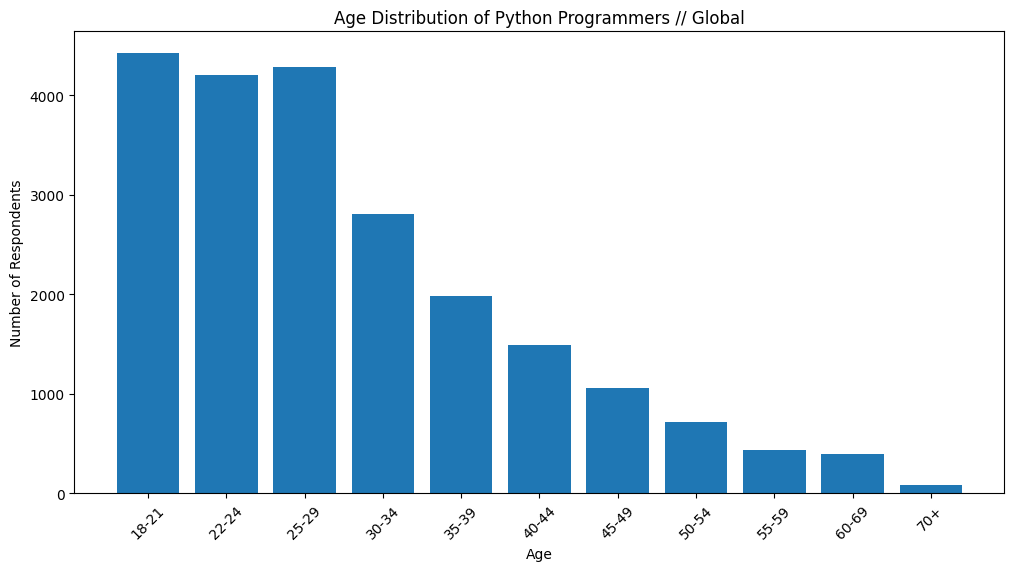

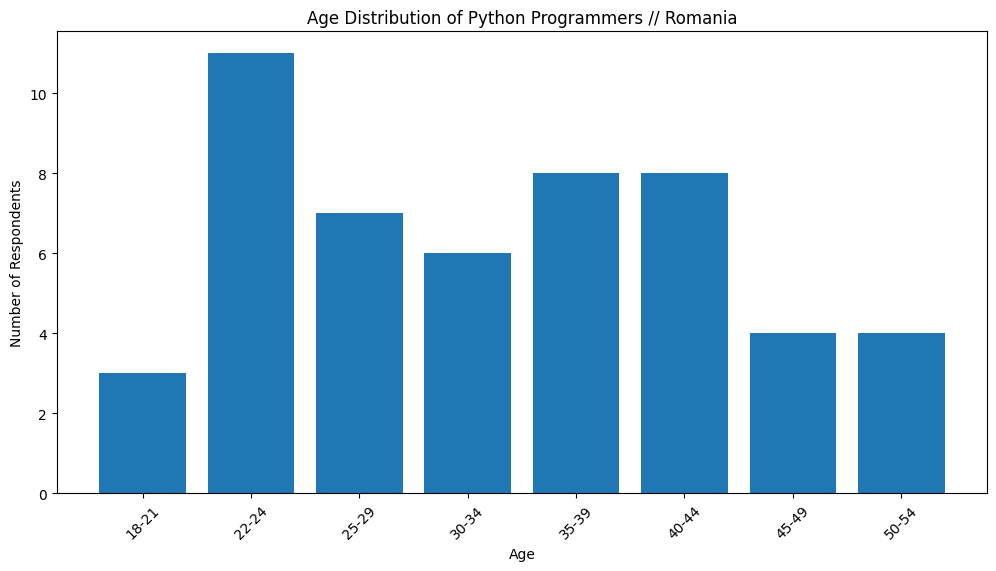

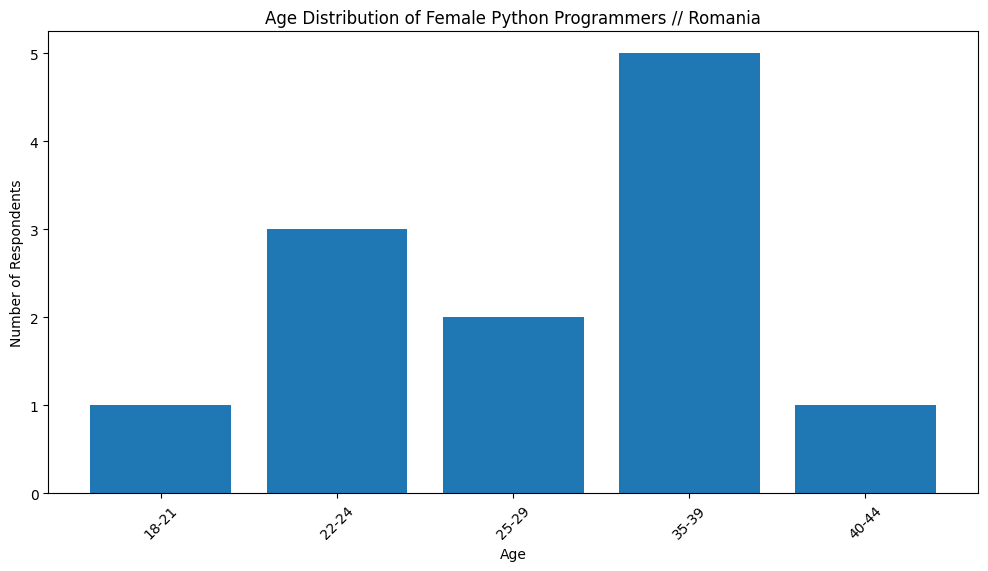

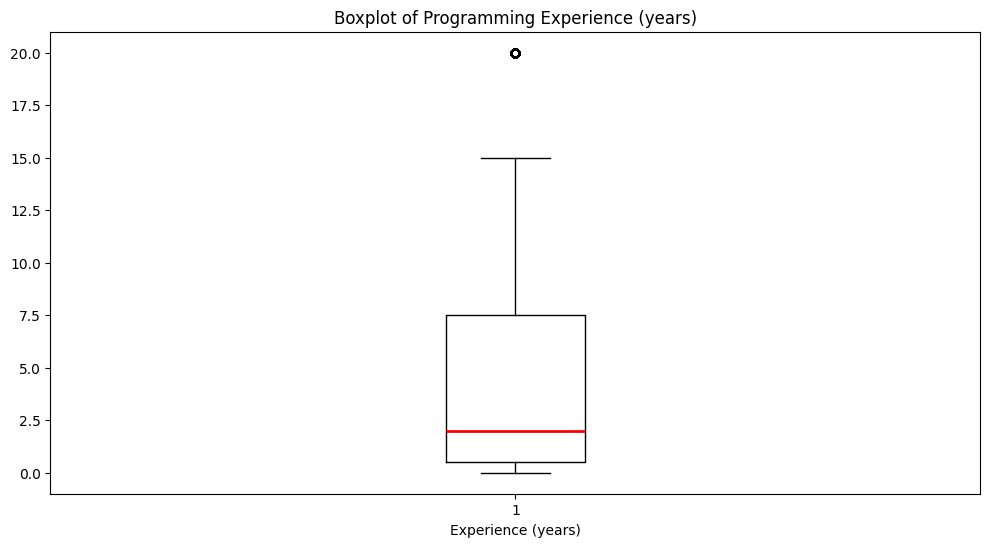

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_python_users():
    survey_data = pd.read_csv("data/surveyDataSience.csv", delimiter=',', header=[0,1], low_memory=False)
    survey_data.columns = survey_data.columns.get_level_values(0)
    survey_data = survey_data[1:].reset_index(drop=True)

    # Distribution of respondents who program in Python by age category
    python_programmers = survey_data[survey_data['Q7_Part_1'] == 'Python']
    age_distribution_python = python_programmers['Q1'].value_counts().sort_index()
    plt.figure(figsize=(12,6))
    plt.bar(age_distribution_python.index, age_distribution_python.values)
    plt.title('Age Distribution of Python Programmers // Global')
    plt.xlabel('Age')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45)
    plt.show()

    # Distribution of respondents from Romania who program in Python by age category
    romania_python_programmers = python_programmers[python_programmers['Q3'] == 'Romania']
    age_distribution_romania_python = romania_python_programmers['Q1'].value_counts().sort_index()
    plt.figure(figsize=(12,6))
    plt.bar(age_distribution_romania_python.index, age_distribution_romania_python.values)
    plt.title('Age Distribution of Python Programmers // Romania')
    plt.xlabel('Age')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45)
    plt.show()

    # Distribution of female respondents from Romania who program in Python by age category
    romania_female_python_programmers = romania_python_programmers[romania_python_programmers['Q2'] == 'Woman']
    age_distribution_romania_female_python = romania_female_python_programmers['Q1'].value_counts().sort_index()
    plt.figure(figsize=(12,6))
    plt.bar(age_distribution_romania_female_python.index, age_distribution_romania_female_python.values)
    plt.title('Age Distribution of Female Python Programmers // Romania')
    plt.xlabel('Age')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45)
    plt.show()

    # Respondents who can be considered "outliers" in terms of programming experience (using a boxplot to identify these values)
    experience_mapping = {
        'I have never written code': 0,
        '< 1 years': 0.5,
        '1-3 years': 2,
        '3-5 years': 4,
        '5-10 years': 7.5,
        '10-20 years': 15,
        '20+ years': 20,
    }
    survey_data['programming_experience_years'] = survey_data['Q6'].map(experience_mapping)
    experience_data = survey_data['programming_experience_years'].dropna()  # Remove null values
    mean_experience = experience_data.mean()  # Calculate mean

    plt.figure(figsize=(12, 6))
    plt.boxplot(
        experience_data,
        medianprops={'color': 'red', 'linewidth': 2}
    )
    plt.title('Boxplot of Programming Experience (years)')
    plt.xlabel('Experience (years)')
    plt.show()

analyze_python_users()